In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
sizes = [5, 10, 100, 200, 400, 600, 800, 1000]

# Непрерывное распределение

## Генерация выборок выбранных случайных величин

In [ ]:
t = 0.6

In [ ]:
def density(x):
  if 0 <= x <= t:
    return (2 * x) / t
  elif t < x <= 1:
    return (2 * (1 - x)) / (1 - t)
  else:
    return 0

In [ ]:
def con_dist_model(u):
  if 0 <= u <= t:
    return np.sqrt(t * u)
  else:
    return 1 - np.sqrt((1 - t) * (1 - u))

In [ ]:
df_con = dict() # словарь, где ключ - объем выборки, значение - 5 выборок с треугольным распределением
for n in sizes:
  np.random.seed(99)
  df_uni = np.random.uniform(size=(5, n))# 5 выборок размера n
  df_con[n] = [[con_dist_model(u) for u in df_uni[i]] for i in range(5)]

In [ ]:
df_con[5]

[[0.6379384354178377,
  0.5411534343828469,
  0.7357994504440964,
  0.1373602292360452,
  0.7229079310877684],
 [0.5825551062056862,
  0.4225795773843861,
  0.1673840861736024,
  0.9387705935707233,
  0.0639956234924945],
 [0.696548539756316,
  0.6817341369196499,
  0.47588166785554903,
  0.5445075493917284,
  0.8314157683477832],
 [0.48710617590777083,
  0.8979339367447926,
  0.5609356729832254,
  0.23699758644056176,
  0.726729740207339],
 [0.3563875297392125,
  0.5767213111671973,
  0.41876182917679705,
  0.7288117701574703,
  0.7377349174646471]]

## Построение эмпирической функции распределения

In [ ]:
def emp(df: list, x_lst: list): # Э.ф.р.
  return [np.sum(np.array(df) <= x) / len(df) for x in x_lst]

In [ ]:
emp(df_con[5][0], [0.5, 0.7])

[0.2, 0.6]

In [ ]:
def tdf(x_lst):
  res = []
  for x in x_lst:
    if x < 0:
      res.append(0)
    elif 0 <= x <= t:
      res.append(x**2 / t)
    elif t < x <= 1:
      res.append(1 - ((1-x)**2)/(1-t))
    else:
      res.append(1)
  return res

In [ ]:
tdf([-5, 5, 0.1, 0.9])

[0, 1, 0.01666666666666667, 0.975]

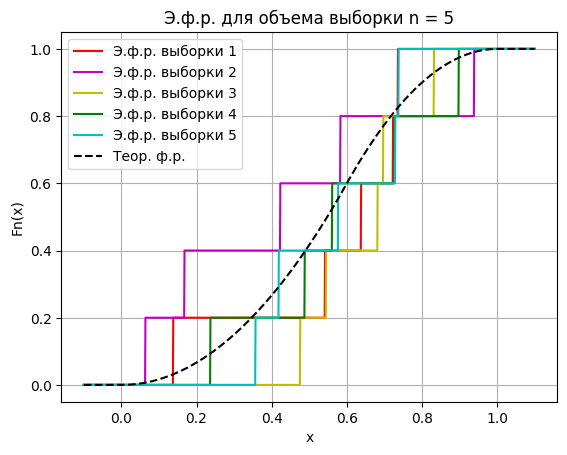

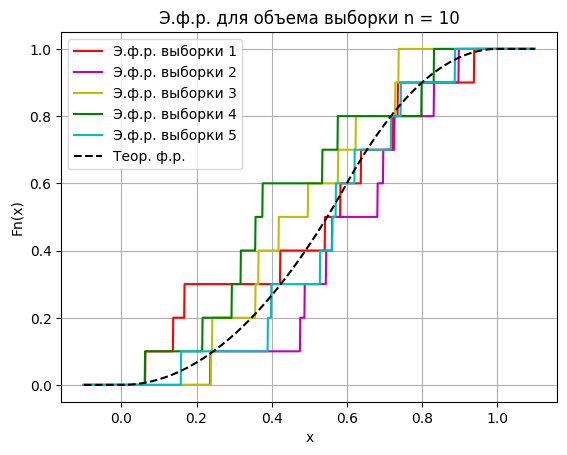

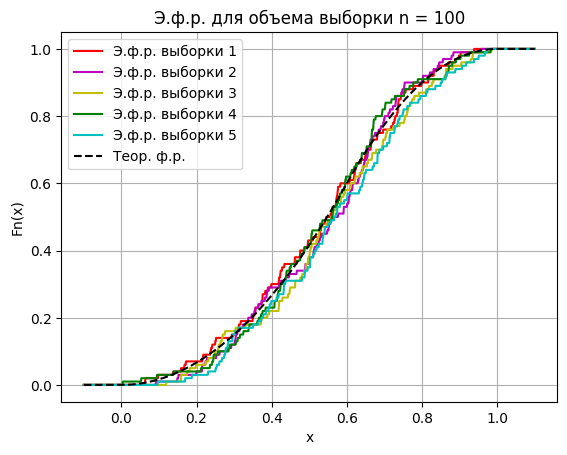

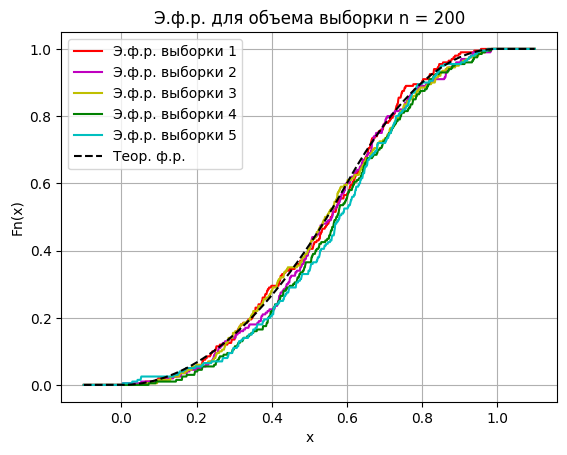

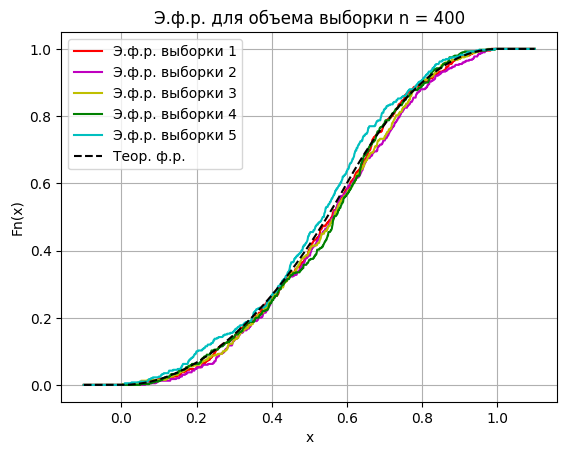

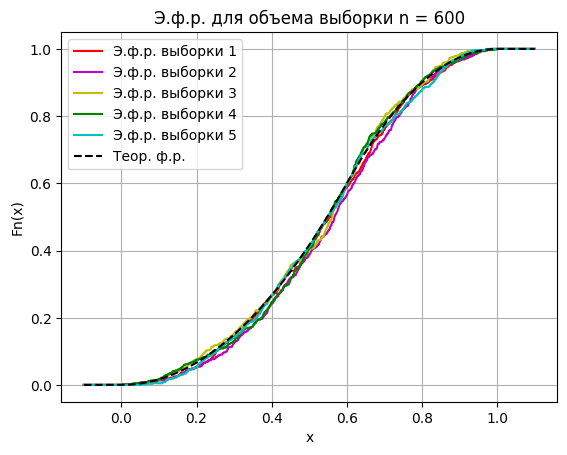

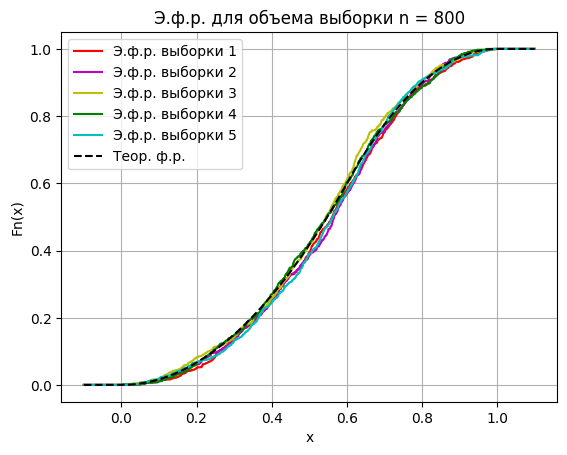

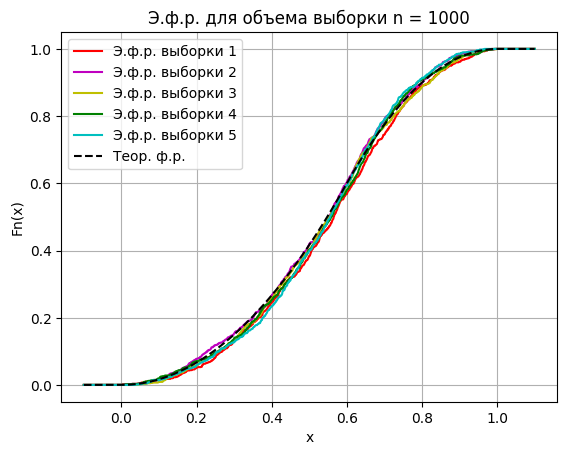

In [ ]:
for n in sizes:
  x = np.arange(-0.1, 1.1 + 2 * 1 / 100 * 0.05, 2 * 1 / 100 * 0.05)

  for i in range(5): # на одном графике отобразим э.ф.р. для 5 выборок одного объема
    plt.plot(x, emp(df_con[n][i], x), 'rmygc'[i])

  plt.plot(x, tdf(x), '--k')

  plt.legend(['Э.ф.р. выборки ' + str(i) for i in range(1, 6)] + ['Теор. ф.р.'])

  plt.grid(True)
  plt.xlabel('x')
  plt.ylabel('Fn(x)')
  plt.title(f'Э.ф.р. для объема выборки n = {n}')
  plt.show()

### $D_{m,n}$

In [ ]:
for n in sizes:
  for m in sizes:
      for i in range(5):
        for j in range(5):
          x_lst = df_con[n][i] + df_con[m][j] # будем рассматривать только те иксы, которые влияют на результат, т.е. те в которых есть переход на следующую ступеньку
          c = np.sqrt((n * m) / (n + m))
          differences = np.abs(np.array(emp(df_con[n][i], x_lst)) - np.array(emp(df_con[m][j], x_lst)))
          sup = np.max(differences)
          print(f'(n, m) = {n, m}' + (8 - len(str(n)) - len(str(m))) * ' ' + f' | (i, j) = {i, j} | D = {np.round(c * sup, 5)}')

(n, m) = (5, 5)       | (i, j) = (0, 0) | D = 0.0
(n, m) = (5, 5)       | (i, j) = (0, 1) | D = 0.63246
(n, m) = (5, 5)       | (i, j) = (0, 2) | D = 0.31623
(n, m) = (5, 5)       | (i, j) = (0, 3) | D = 0.31623
(n, m) = (5, 5)       | (i, j) = (0, 4) | D = 0.31623
(n, m) = (5, 5)       | (i, j) = (1, 0) | D = 0.63246
(n, m) = (5, 5)       | (i, j) = (1, 1) | D = 0.0
(n, m) = (5, 5)       | (i, j) = (1, 2) | D = 0.94868
(n, m) = (5, 5)       | (i, j) = (1, 3) | D = 0.63246
(n, m) = (5, 5)       | (i, j) = (1, 4) | D = 0.63246
(n, m) = (5, 5)       | (i, j) = (2, 0) | D = 0.31623
(n, m) = (5, 5)       | (i, j) = (2, 1) | D = 0.94868
(n, m) = (5, 5)       | (i, j) = (2, 2) | D = 0.0
(n, m) = (5, 5)       | (i, j) = (2, 3) | D = 0.31623
(n, m) = (5, 5)       | (i, j) = (2, 4) | D = 0.63246
(n, m) = (5, 5)       | (i, j) = (3, 0) | D = 0.31623
(n, m) = (5, 5)       | (i, j) = (3, 1) | D = 0.63246
(n, m) = (5, 5)       | (i, j) = (3, 2) | D = 0.31623
(n, m) = (5, 5)       | (i, j) = (3, 3) 

## Построение гистограммы и полигона частот

In [174]:
def plot_hist(n, n_bins):
    len_interval = (max(df_con[n][0]) - min(df_con[n][0])) / n_bins
    h = plt.hist(df_con[n][0], bins = n_bins, weights = [1 / (n * len_interval)] * n, color = 'g')

    assert(np.abs(h[1][1] - h[1][0] - len_interval) < 0.0001) # длина интервала

    plt.plot(np.linspace(0, 1, 10000), [density(x) for x in np.linspace(0, 1, 10000)], 'k')
    plt.plot(h[1][:-1] + len_interval / 2, h[0], 'r', marker = 'o')

    plt.grid(True)
    plt.legend(['Плотность распределения', 'Полигон частот',  'Гистограмма частот'])
    plt.title(f'Гистограмма частот для выборки объема n = {n}')
    plt.show()

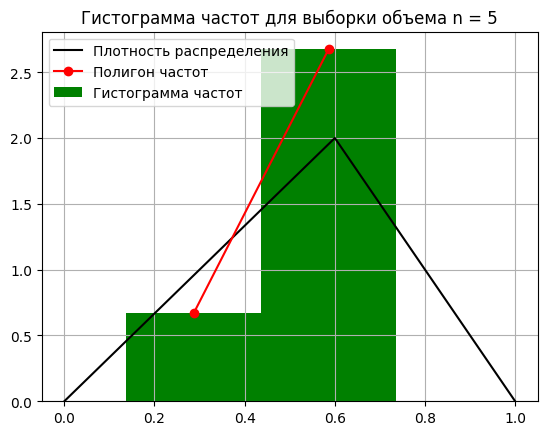

In [211]:
plot_hist(5, 2)

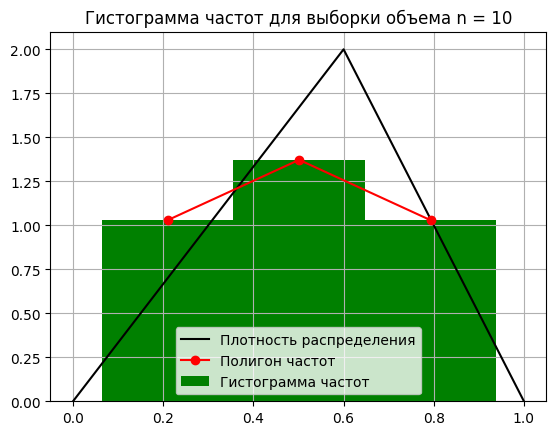

In [215]:
plot_hist(10, 3)

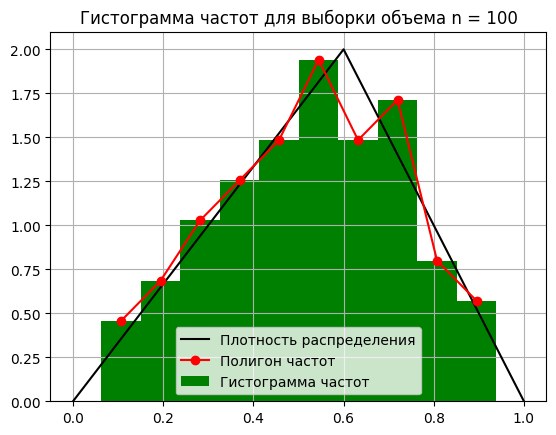

In [220]:
plot_hist(100, 10)

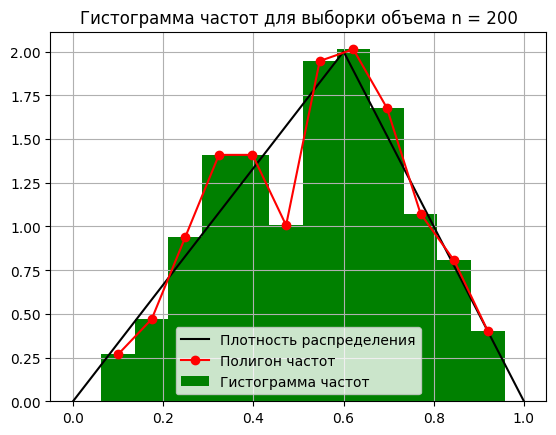

In [231]:
plot_hist(200, 12)

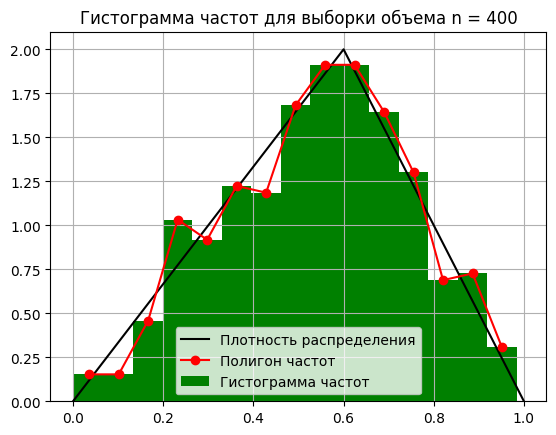

In [232]:
plot_hist(400, 15)

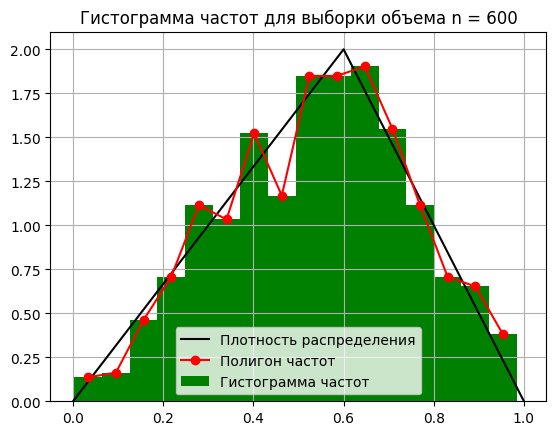

In [241]:
plot_hist(600, 16)

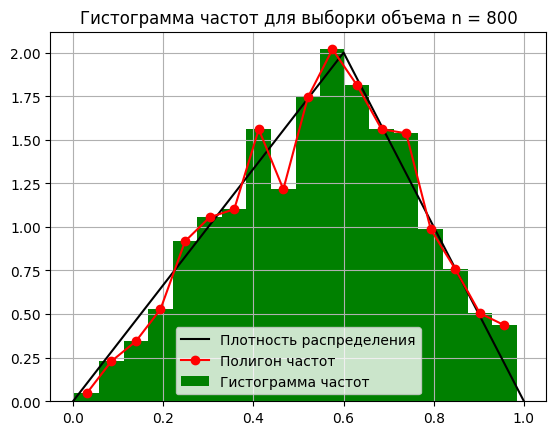

In [246]:
plot_hist(800, 18)

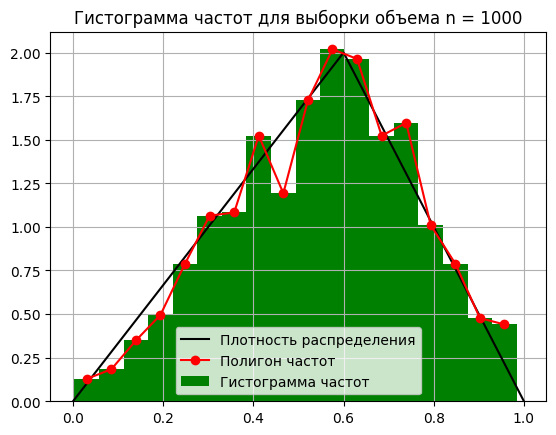

In [250]:
plot_hist(1000, 18)

## Вычисление выборочных моментов

In [251]:
for n in sizes:
  for i in range(5):
    df = np.array(df_con[n][i])
    sample_av = df.mean()
    sample_var = np.mean((df - sample_av)**2)
    print(f'\item $(n, i) = {n, i}$ | $\overline{{X}} = {np.round(sample_av, 5)}$ | $\overline{{S}}^2 = {np.round(sample_var, 5)}$')

\item $(n, i) = (5, 0)$ | $\overline{X} = 0.55503$ | $\overline{S}^2 = 0.04847$
\item $(n, i) = (5, 1)$ | $\overline{X} = 0.43506$ | $\overline{S}^2 = 0.09699$
\item $(n, i) = (5, 2)$ | $\overline{X} = 0.64602$ | $\overline{S}^2 = 0.01549$
\item $(n, i) = (5, 3)$ | $\overline{X} = 0.58194$ | $\overline{S}^2 = 0.04985$
\item $(n, i) = (5, 4)$ | $\overline{X} = 0.56368$ | $\overline{S}^2 = 0.02434$
\item $(n, i) = (10, 0)$ | $\overline{X} = 0.49504$ | $\overline{S}^2 = 0.07633$
\item $(n, i) = (10, 1)$ | $\overline{X} = 0.61398$ | $\overline{S}^2 = 0.0337$
\item $(n, i) = (10, 2)$ | $\overline{X} = 0.47832$ | $\overline{S}^2 = 0.03059$
\item $(n, i) = (10, 3)$ | $\overline{X} = 0.43623$ | $\overline{S}^2 = 0.05491$
\item $(n, i) = (10, 4)$ | $\overline{X} = 0.55747$ | $\overline{S}^2 = 0.03869$
\item $(n, i) = (100, 0)$ | $\overline{X} = 0.52835$ | $\overline{S}^2 = 0.04418$
\item $(n, i) = (100, 1)$ | $\overline{X} = 0.54115$ | $\overline{S}^2 = 0.03755$
\item $(n, i) = (100, 2)$ | $\ov

In [252]:
Mxi = 8/15
Dxi = 19/450
Mxi, Dxi

(0.5333333333333333, 0.042222222222222223)

In [254]:
for n in sizes:
  for i in range(5):
    df = np.array(df_con[n][i])
    sample_av = df.mean()
    sample_var = np.mean((df - sample_av)**2)
    print(f'\item $(n, i) = {n, i} \\Rightarrow |\overline{{X}} - M\\xi| = {np.round(np.abs(sample_av - Mxi), 5)}$; |$\overline{{S}}^2 - D\\xi| = {np.round(np.abs(sample_var - Dxi), 5)}$')

\item $(n, i) = (5, 0) \Rightarrow |\overline{X} - M\xi| = 0.0217$; |$\overline{S}^2 - D\xi| = 0.00625$
\item $(n, i) = (5, 1) \Rightarrow |\overline{X} - M\xi| = 0.09828$; |$\overline{S}^2 - D\xi| = 0.05477$
\item $(n, i) = (5, 2) \Rightarrow |\overline{X} - M\xi| = 0.11268$; |$\overline{S}^2 - D\xi| = 0.02673$
\item $(n, i) = (5, 3) \Rightarrow |\overline{X} - M\xi| = 0.04861$; |$\overline{S}^2 - D\xi| = 0.00763$
\item $(n, i) = (5, 4) \Rightarrow |\overline{X} - M\xi| = 0.03035$; |$\overline{S}^2 - D\xi| = 0.01788$
\item $(n, i) = (10, 0) \Rightarrow |\overline{X} - M\xi| = 0.03829$; |$\overline{S}^2 - D\xi| = 0.03411$
\item $(n, i) = (10, 1) \Rightarrow |\overline{X} - M\xi| = 0.08065$; |$\overline{S}^2 - D\xi| = 0.00853$
\item $(n, i) = (10, 2) \Rightarrow |\overline{X} - M\xi| = 0.05502$; |$\overline{S}^2 - D\xi| = 0.01163$
\item $(n, i) = (10, 3) \Rightarrow |\overline{X} - M\xi| = 0.09711$; |$\overline{S}^2 - D\xi| = 0.01269$
\item $(n, i) = (10, 4) \Rightarrow |\overline{X} - 

In [255]:
for n in sizes:
  for i in range(5):
    df = np.array(df_con[n][i])
    sample_av = df.mean()
    sample_var = np.mean((df - sample_av)**2)
    print(f'\item $(n, i) = {n, i} \\Rightarrow |\overline{{X}} - M\\xi| = {np.abs(sample_av - Mxi):.5f}$; |$\overline{{S}}^2 - D\\xi| = {np.abs(sample_var - Dxi):.5f}$')

\item $(n, i) = (5, 0) \Rightarrow |\overline{X} - M\xi| = 0.02170$; |$\overline{S}^2 - D\xi| = 0.00625$
\item $(n, i) = (5, 1) \Rightarrow |\overline{X} - M\xi| = 0.09828$; |$\overline{S}^2 - D\xi| = 0.05477$
\item $(n, i) = (5, 2) \Rightarrow |\overline{X} - M\xi| = 0.11268$; |$\overline{S}^2 - D\xi| = 0.02673$
\item $(n, i) = (5, 3) \Rightarrow |\overline{X} - M\xi| = 0.04861$; |$\overline{S}^2 - D\xi| = 0.00763$
\item $(n, i) = (5, 4) \Rightarrow |\overline{X} - M\xi| = 0.03035$; |$\overline{S}^2 - D\xi| = 0.01788$
\item $(n, i) = (10, 0) \Rightarrow |\overline{X} - M\xi| = 0.03829$; |$\overline{S}^2 - D\xi| = 0.03411$
\item $(n, i) = (10, 1) \Rightarrow |\overline{X} - M\xi| = 0.08065$; |$\overline{S}^2 - D\xi| = 0.00853$
\item $(n, i) = (10, 2) \Rightarrow |\overline{X} - M\xi| = 0.05502$; |$\overline{S}^2 - D\xi| = 0.01163$
\item $(n, i) = (10, 3) \Rightarrow |\overline{X} - M\xi| = 0.09711$; |$\overline{S}^2 - D\xi| = 0.01269$
\item $(n, i) = (10, 4) \Rightarrow |\overline{X} -